<a href="https://colab.research.google.com/github/Caspian4/Workshop/blob/style_transfer/Style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [80]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [81]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [82]:
from google.colab import files

# Upload content image
print("Please upload the content image.")
uploaded_content = files.upload()
content_path = list(uploaded_content.keys())[0]  # Get the content image path

# Upload style image
print("Please upload the style image.")
uploaded_style = files.upload()
style_path = list(uploaded_style.keys())[0]  # Get the style image path


Please upload the content image.


Saving WhatsApp Image 2024-12-03 at 16.23.25_aef6e61a.jpg to WhatsApp Image 2024-12-03 at 16.23.25_aef6e61a.jpg
Please upload the style image.


Saving Mona_Lisa.jpg to Mona_Lisa (2).jpg


In [83]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [84]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

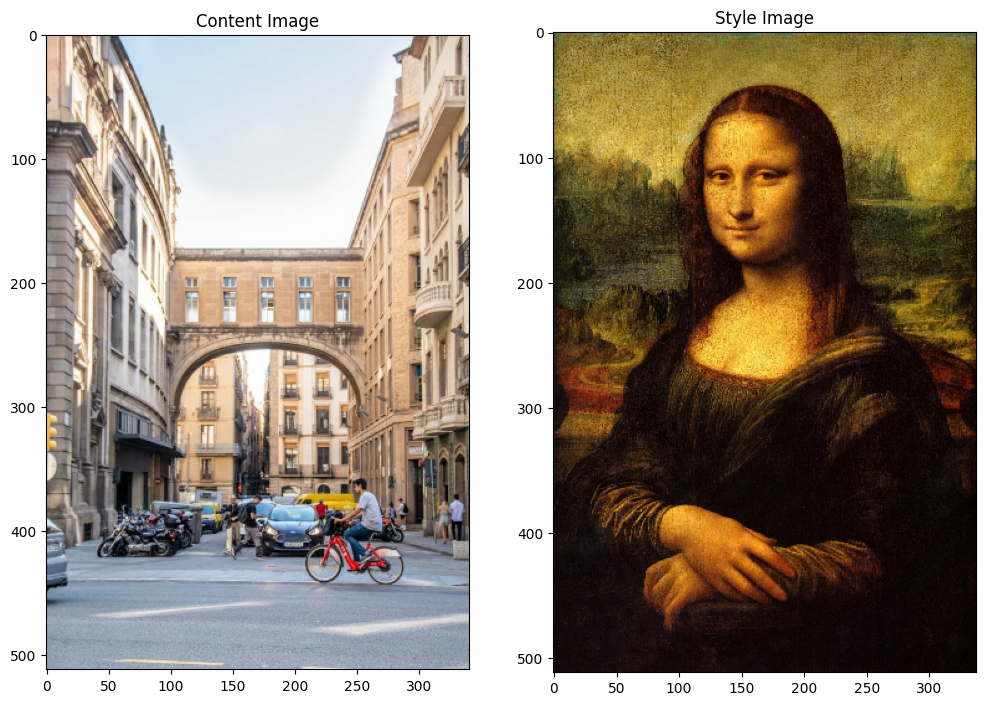

In [85]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

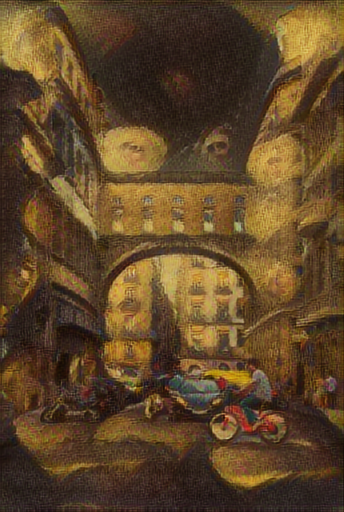

In [86]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [42]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [78]:
import os
import tensorflow as tf
import gradio as gr
import numpy as np
import PIL.Image
import tensorflow_hub as hub

# TensorFlow Hub Model
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

# Load image function
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Style transfer function
def style_transfer(content_image, style_image):
    # Load content and style images into TensorFlow
    content_image = load_img(content_image)
    style_image = load_img(style_image)

    # Load pre-trained style transfer model from TensorFlow Hub
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

    # Apply style transfer
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    # Convert tensor to image format
    output_image = tensor_to_image(stylized_image)

    # Save output image to file
    output_path = "stylized_output_image.jpg"
    output_image.save(output_path)

    return output_image, output_path  # Return image and path for displaying or download

# Gradio interface for content and style image uploads
def download_image(output_path):
    return output_path  # Return the path to the image for downloading

# Define the interface
interface = gr.Interface(
    fn=style_transfer,  # Function to perform style transfer
    inputs=[
        gr.Image(type="filepath", label="Upload Content Image"),  # Content image input
        gr.Image(type="filepath", label="Upload Style Image")  # Style image input
    ],
    outputs=[
        gr.Image(type="pil", label="Stylized Image"),  # Output image
        gr.File(label="Download Image")  # Add download button for the stylized image
    ],
    live=False,  # Disable real-time updates
    title="AI Style Transfer",  # Title for the web page
    description="Welcome to the AI Style Transfer tool! Upload a content image and a style image to transform the content using the chosen style.",
    theme="default",  # Switch theme to default
    css="""
    .gradio-container {
        background-color: #f7f7f7 !important;
        padding: 30px;
        border-radius: 10px;
        box-shadow: 0 5px 15px rgba(0,0,0,0.1);
    }
    .gradio-container h1 {
        color: #000000 !important;  # Set title color to black (dark)
        font-size: 36px;
        font-weight: bold;
        text-align: center;
        margin-bottom: 20px;
    }
    .gradio-container p {
        color: #000000 !important;  # Dark color to ensure visibility on white background
        font-size: 18px;
        text-align: center;
        margin-bottom: 30px;
    }
    .gradio-container .gradio-button {
        background-color: #3f72af;
        color: white;
    }
    .gradio-container .gradio-button:hover {
        background-color: #5a8be1;
    }
    #content-image, #style-image {
        margin-bottom: 20px;
    }
    #stylized-image {
        margin-top: 20px;
    }
    .footer {
        font-size: 14px;
        text-align: center;
        margin-top: 30px;
        color: #9e9e9e;
    }
    """
)

# Launch the Gradio interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a716fe3f706dd9fb15.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
